# The Data Incubator - Stannford Open Policing

In [ ]:
import pandas as pd

In [226]:
montana = pd.read_csv('MT_cleaned.csv')

C:\Users\chels\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [215]:
montana.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,lon,ethnicity,city,out_of_state,vehicle_year,vehicle_make,vehicle_model,vehicle_style,search_reason,stop_outcome_raw
0,MT-2009-00001,MT,2009-01-01,02:10,CASCADE,Cascade County,30013.0,US 89 N MM10 (SB),NaN,F,...,-111.802932,N,NaN,False,1994,FORD,EXPLORER,SPORT UTILITY,NaN,"TRAFFIC CITATION,WARNING"
1,MT-2009-00002,MT,2009-01-02,11:34,MISSOULA,Missoula County,30063.0,HWY 93 SO AND ANNS LANE S/B,NaN,M,...,-114.081142,N,NaN,False,1996,GMC,TK,TRUCK,NaN,"INFFRACTION ARREST,WARNING"
2,MT-2009-00003,MT,2009-01-03,11:36,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 77 N/B,NaN,M,...,-114.073505,N,NaN,False,1999,GMC,YUKON,SPORT UTILITY,NaN,INFFRACTION ARREST
3,MT-2009-00004,MT,2009-01-04,10:33,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 81 S/B,NaN,F,...,-114.079027,NaN,NaN,False,2002,HOND,CR-V,SPORT UTILITY,NaN,INFFRACTION ARREST
4,MT-2009-00005,MT,2009-01-04,10:46,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 81 N/B,NaN,M,...,-114.079150,NaN,NaN,False,1992,TOYT,TERCEL,SEDAN,NaN,INFFRACTION ARREST


# Question -1) What proportion of traffic stops in Montana involved male drivers? In other words, divide the number of traffic stops involving male drivers by the total number of stops.

In [222]:
montmale=montana.copy()

In [223]:
montmale.dropna(subset=['stop_outcome_raw'],inplace=True)

Selecting all those rows from Montana Dataset which have stop_outcome_raw as a Traffic Citation which i have considered to be a traffic stop

In [224]:
md = montmale[montmale['stop_outcome_raw'].str.match('TRAFFIC')]

In [233]:
md['driver_gender'].value_counts()
# The above command gives the total count of male and female drivers who have been stopped for traffic.

M    261389
F    121106
Name: driver_gender, dtype: int64

In [110]:
montana.isnull().sum()
#Checking for nulls

id                            0
state                         0
stop_date                    11
stop_time                    11
location_raw                  4
county_name                4056
county_fips                4056
fine_grained_location      3741
police_department        825118
driver_gender               119
driver_age_raw                0
driver_age                 3480
driver_race_raw             106
driver_race                2739
violation_raw                73
violation                    73
search_conducted              0
search_type_raw          822092
search_type              822092
contraband_found           3026
stop_outcome                 53
is_arrested                   0
lat                         436
lon                         436
ethnicity                    98
city                     549630
out_of_state               4699
vehicle_year               6610
vehicle_make               4268
vehicle_model             23805
vehicle_style             65362
search_r

In [112]:
total_stop=montana['stop_outcome_raw'].count()
total_stop
#Checking for total stops

825065

In [113]:
total=total_stop-53
total
#Subtracting 53 as there are 53 null values in stop_outcome_raw

825012

In [114]:
#Number of male drivers who are involved in traffic stops in montana are 261389
#Number of total stops are 825012

In [246]:
# Proportion of male drivers involved in traffic stops in Montana are
261389/825012

0.31683054307088865

# Question 2) How many more times likely are you to be arrested in Montana during a traffic stop if you have out of state plates?

In [116]:
arrested = montana.copy()

In [119]:
arrested.dropna(subset=['stop_outcome_raw'],inplace=True)

In [120]:
arrestedts = arrested[arrested['stop_outcome_raw'].str.match('TRAFFIC')]

In [121]:
arrestedts.dropna(subset=['out_of_state'],inplace=True)

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
arrestedts.dropna(subset=['is_arrested'],inplace=True)

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
arrestedtsmt = arrestedts[arrestedts['out_of_state']==True]

In [136]:
arrestedtsmtos = arrestedtsmt[arrestedtsmt['is_arrested']==True]

In [137]:
arrestedtsmtos

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,lon,ethnicity,city,out_of_state,vehicle_year,vehicle_make,vehicle_model,vehicle_style,search_reason,stop_outcome_raw


 Since, there are no rows retrieved for out_of_state = True and is_arrested=True, you are not likely to be arrested if you have an out of state plate and if you are caught at a traffic stop. Hence, the answer is 0

# What proportion of traffic stops in Montana resulted in speeding violations? In other words, find the number of violations that include "Speeding" in the violation description and divide that number by the total number of stops (or rows in the Montana dataset).

In [44]:
montana['violation'].value_counts()


Speeding                                                336980
License,Speeding                                         58572
Paperwork,Speeding                                       46513
Lights                                                   42809
License,Paperwork,Speeding                               28708
Safe movement                                            26136
License                                                  20602
Seat belt,Speeding                                       16473
Registration/plates                                      15988
License,Lights                                           12442
Stop sign/light                                          11239
License,Paperwork                                         9645
Other                                                     9118
Lights,Paperwork                                          7947
Truck                                                     7353
License,Lights,Paperwork                               

In [254]:
speeding = md[md['violation'].str.match('Speeding')]
#Re-using the "md" dataframe as the dataframe is already filtered for only traffic stops. The next filter which is being
# used here is to filter the violation column by Speeding to get a row count

In [255]:
speeding

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,lon,ethnicity,city,out_of_state,vehicle_year,vehicle_make,vehicle_model,vehicle_style,search_reason,stop_outcome_raw
8,MT-2009-00009,MT,2009-01-06,16:45,YELLOWSTONE,Yellowstone County,30111.0,INTERSECTION OF HWY 312 & SHEPHERD ROAD,NaN,M,...,-108.342213,N,NaN,False,1992,BMW,NaN,4D,NaN,TRAFFIC CITATION
71,MT-2009-00072,MT,2009-02-27,16:33,RAVALLI,Ravalli County,30081.0,P007 HWY 93 MM 77 N/B,NaN,F,...,-114.076045,N,NaN,False,2008,HUMM,HU2,SPORT UTILITY,NaN,TRAFFIC CITATION
77,MT-2009-00078,MT,2009-03-04,15:50,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 78 N/B,NaN,F,...,-114.074272,N,NaN,False,2008,BUIC,ENCLAVE,SPORT UTILITY,NaN,TRAFFIC CITATION
79,MT-2009-00080,MT,2009-03-05,16:49,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 80 N/B,NaN,M,...,-114.078420,N,NaN,False,1990,CHRY,NEW YORKER,SEDAN,NaN,TRAFFIC CITATION
83,MT-2009-00084,MT,2009-03-10,15:43,RAVALLI,Ravalli County,30081.0,P007 HWY 93 MM 73 S/B,NaN,M,...,NaN,N,NaN,False,2000,CHRY,CON,SEDAN,NaN,TRAFFIC CITATION
85,MT-2009-00086,MT,2009-03-11,08:56,RAVALLI,Ravalli County,30081.0,P007 HWY 93 MM 77 S/B,NaN,F,...,-114.076158,N,NaN,True,2001,ACURA,MDX,SPORT UTILITY,NaN,TRAFFIC CITATION
89,MT-2009-00090,MT,2009-03-17,18:43,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 77 N/B,NaN,M,...,-114.075360,N,NaN,False,2007,MAZD,CX-9,SPORT UTILITY,NaN,TRAFFIC CITATION
91,MT-2009-00092,MT,2009-03-18,14:39,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 77 S/B,NaN,F,...,-114.075373,N,NaN,False,1996,HOND,ACC,SEDAN,NaN,TRAFFIC CITATION
101,MT-2009-00102,MT,2009-03-24,16:37,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 80 N/B,NaN,M,...,-114.080398,N,NaN,False,2003,BUIC,PAR,SEDAN,NaN,TRAFFIC CITATION
102,MT-2009-00103,MT,2009-03-24,16:51,MISSOULA,Missoula County,30063.0,P007 HWY 93 MM 79 N/B,NaN,M,...,-114.074057,N,NaN,False,1999,CHEV,TK,TRUCK,NaN,TRAFFIC CITATION


In [ ]:
#Number of rows fetched by vehicles who were booked for speeding after being caught at a traffic stop are 165009
#Number of total rows/stops in montana dataset are 825012

In [256]:
#The proportion of traffic stops that resulted in speeding violations in Montana are
165009/825012

0.20000799988363804

# How much more likely does a traffic stop in Montana result in a DUI than a traffic stop in Vermont? To compute the proportion of traffic stops that result in a DUI, divide the number of stops with "DUI" in the violation description by the total number of stops.

In [152]:
montana1=montana.copy()

In [153]:
montana1.dropna(subset=['stop_outcome_raw'], inplace=True)

In [154]:
dui=montana1[montana1['stop_outcome_raw'].str.match('TRAFFIC')]
#Again filtering the dataframe to get only traffic stops. This is the most common filter method being used for most questions
# revolving around Montana dataset for traffic stops

In [155]:
duif = dui[dui['violation'].str.match('DUI')]
#Filtering the dui dataframe by DUI value filter in the violation column. This gives us the row count of DUI violation for
#all traffic stops in Montana

In [156]:
duif

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,lon,ethnicity,city,out_of_state,vehicle_year,vehicle_make,vehicle_model,vehicle_style,search_reason,stop_outcome_raw
112,MT-2009-00113,MT,2009-04-17,15:46,RAVALLI,Ravalli County,30081.0,P007 (HWY 93) MM 74 N/B,NaN,M,...,-114.078547,N,NaN,False,1995,FORD,ESC,SEDAN,NaN,TRAFFIC CITATION
145,MT-2009-00146,MT,2009-05-13,12:56,YELLOWSTONE,Yellowstone County,30111.0,main st / airport road,NaN,F,...,-108.477511,N,NaN,False,1996,FORD,TAURUS,SEDAN,NaN,TRAFFIC CITATION
233,MT-2009-00234,MT,2009-07-10,20:00,MINERAL,Mineral County,30061.0,WHITE TAIL ROAD AND CROWS NEST MAIN,NaN,M,...,-115.407774,N,NaN,False,2004,HONDA,400,OPEN BODY,NaN,TRAFFIC CITATION
241,MT-2009-00242,MT,2009-07-14,20:20,YELLOWSTONE,Yellowstone County,30111.0,crash at i90 mm 446wb,NaN,F,...,-108.570914,N,NaN,False,2008,NISSAN,MAXIMA,NaN,NaN,TRAFFIC CITATION
243,MT-2009-00244,MT,2009-07-15,02:04,YELLOWSTONE,Yellowstone County,30111.0,Main & Wicks,NaN,M,...,-108.471178,N,NaN,False,1992,CHEVY,S10 TK,NaN,NaN,TRAFFIC CITATION
253,MT-2009-00254,MT,2009-07-21,19:35,RAVALLI,Ravalli County,30081.0,Hwy 93 MM 49 n/b,NaN,M,...,-114.162953,N,NaN,False,1995,HARLEY-DAV,MC,MOTORCYCLE,NaN,TRAFFIC CITATION
255,MT-2009-00256,MT,2009-07-24,14:24,GALLATIN,Gallatin County,30031.0,I-90 MM 290 EB,NaN,F,...,-111.337764,N,NaN,False,1987,TOYOT,SR5 Style,PICKUP,NaN,TRAFFIC CITATION
275,MT-2009-00276,MT,2009-08-07,02:30,LINCOLN,Lincoln County,30053.0,Hwy 93 mp 181 sb,NaN,M,...,-115.057421,N,NaN,False,2008,FORD,F-350,TRUCK,NaN,TRAFFIC CITATION
281,MT-2009-00282,MT,2009-08-08,22:05,YELLOWSTONE,Yellowstone County,30111.0,"I90MM443EB, was called in by another motorist",NaN,M,...,-108.608136,N,NaN,False,1994,NISSAN,ALTIMA,NaN,NaN,TRAFFIC CITATION
282,MT-2009-00283,MT,2009-08-09,00:24,YELLOWSTONE,Yellowstone County,30111.0,Traveling on I90 when RADD report was received,NaN,M,...,-108.501352,N,NaN,False,1998,GMC,TK,NaN,NaN,TRAFFIC CITATION


In [ ]:
#Number of rows resulting for a traffic stop in Montana for DUI are 6665
#Number of stops in Montana are 825012

In [157]:
#Proportion of traffic stops in MOntana resulting in DUI are
mtdui=6665/825012

In [144]:
verm=pd.read_csv('VT_cleaned.csv')

C:\Users\chels\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [145]:
verm.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                694
county_name                 705
county_fips                 705
fine_grained_location       347
police_department             0
driver_gender              1712
driver_age_raw             1171
driver_age                 1286
driver_race_raw            3984
driver_race                4817
violation_raw              2178
violation                  2178
search_conducted              0
search_type_raw            2240
search_type              279866
contraband_found             34
stop_outcome               2325
is_arrested                   0
officer_id                   12
dtype: int64

In [146]:
verm['stop_outcome'].count()

280960

In [149]:
totalvtstpcnt = 280960 - 2325
totalvtstpcnt
#This gives us the total number of stops after subtracting the null values

278635

In [147]:
verm.dropna(subset=['violation'], inplace=True)
#The data does not provide enough information for which is a traffic stop in the Vermont dataset. As a result, i have just
#filtered the dataframe with DUI value filter in the "Violation" column

In [148]:
vermdui = verm[verm['violation'].str.match('DUI')]
vermdui
#To get a row count of the number of stops being booked for DUI

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
568,VT-2010-00569,VT,2010-07-02,19:39,NaN,NaN,NaN,Lower Newton and Maquam,ST ALBANS VSP,F,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,-2.577520e+08
605,VT-2010-00606,VT,2010-07-02,22:45,NaN,NaN,NaN,Vt 104 Oakland STATION,ST ALBANS VSP,F,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,-2.577520e+08
893,VT-2010-00894,VT,2010-07-04,00:38,NaN,NaN,NaN,US RT 5,ST JOHNSBURY VSP,M,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
894,VT-2010-00895,VT,2010-07-04,00:38,NaN,NaN,NaN,US RT 5,ST JOHNSBURY VSP,M,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
895,VT-2010-00896,VT,2010-07-04,00:38,NaN,NaN,NaN,US RT 5,ST JOHNSBURY VSP,M,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
896,VT-2010-00897,VT,2010-07-04,00:38,NaN,NaN,NaN,BREEZY HILL RD,ST JOHNSBURY VSP,M,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
897,VT-2010-00898,VT,2010-07-04,00:38,NaN,NaN,NaN,BREEZY HILL RD,ST JOHNSBURY VSP,M,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
898,VT-2010-00899,VT,2010-07-04,00:38,NaN,NaN,NaN,US RT 5,ST JOHNSBURY VSP,M,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
899,VT-2010-00900,VT,2010-07-04,00:38,NaN,NaN,NaN,BREEZY HILL RD,ST JOHNSBURY VSP,M,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
909,VT-2010-00910,VT,2010-07-04,01:38,Waterbury,Washington County,50023.0,VT RT 18,ST JOHNSBURY VSP,M,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08


In [288]:
#The number of rows for Vermont traffic stops for getting a DUI are 749
#Total number of rows for all stops in Vermont are 278635

In [150]:
#The proportion for Vermont traffic stops to result in a DUI is
vtdui=749/278635

In [158]:
mtdui/vtdui

3.00534087955039

# Linear Regression - What is the extrapolated, average manufacture year of vehicles involved in traffic stops in Montana in 2020? To answer this question, calculate the average vehicle manufacture year for each year's traffic stops. Extrapolate using a linear regression.


In [23]:
montana=pd.read_csv('MT_cleaned.csv')

C:\Users\chels\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
montana['stop_date']=pd.to_datetime(montana['stop_date'])
#Converting to datetime to extract year from the stop_date

In [24]:
montana2=montana.copy()

In [25]:
montana2.dropna(subset=['stop_outcome_raw'],inplace=True)

In [26]:
ts = montana2[montana2['stop_outcome_raw'].str.match('TRAFFIC')]

In [28]:
ts['stop_date']=pd.to_datetime(ts['stop_date'])

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
ts['year']=ts['stop_date'].dt.year
#Adding another column called year to store the extracted year from stop_time

C:\Users\chels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
include2009 = ts[ts['year'] == 2009]
#Filtering according to year

In [54]:
include2009.to_csv('2009.csv', sep=',', encoding='utf-8')

In [55]:
include2010 = ts[ts['year'] == 2010]
include2010.to_csv('2010.csv', sep=',',encoding='utf-8')

In [56]:
include2011 = ts[ts['year'] == 2011]
include2011.to_csv('2011.csv', sep=',',encoding='utf-8')

In [57]:
include2012 = ts[ts['year'] == 2012]
include2012.to_csv('2012.csv',sep=',',encoding='utf-8')

In [58]:
include2013 = ts[ts['year'] == 2013]
include2013.to_csv('2013.csv',sep=',',encoding='utf-8')

In [59]:
include2014 = ts[ts['year'] == 2014]
include2014.to_csv('2014.csv',sep=',',encoding='utf-8')

In [60]:
include2015 = ts[ts['year'] == 2015]
include2015.to_csv('2015.csv',sep=',',encoding='utf-8')

In [61]:
include2016 = ts[ts['year'] == 2016]
include2016.to_csv('2016.csv',sep=',',encoding='utf-8')

In [89]:
regi= pd.DataFrame(columns=['Year','Year-Average'])

In [90]:
regi['Year']=[2009,2010,2011,2012,2013,2014,2015,2016]

In [91]:
regi['Year-Average']=[2001,2001,2002,2003,2004,2004,2005,2005]
#Creating a dataframe - "regi" which stores the values of the year and the average manufacture year 

In [100]:
regi['const'] = 1
#Adding a constant for linear regression

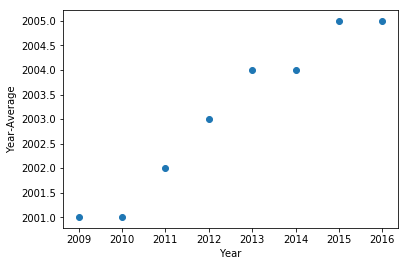

In [99]:
X=regi['Year'] 
y=regi['Year-Average'] 
plt.scatter(X,y)
plt.ylabel('Year-Average') 
plt.xlabel('Year') 
plt.show()
#Since the average manufacture year has to be predicted, the dependent variable is the Year-Average and the independent variable
# is the Year

In [93]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [94]:
p_value

3.104306912158748e-05

In [95]:
slope

0.6547619047619048

In [102]:
import statsmodels.api as sm

reg1 = sm.OLS(endog=regi['Year-Average'], exog=regi[['const', 'Year']], missing='drop')
type(reg1)
#PLotting a OLS model for linear regression

statsmodels.regression.linear_model.OLS

In [103]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [104]:
print(results.summary())

C:\Users\chels\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:           Year-Average   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     124.3
Date:                Tue, 01 May 2018   Prob (F-statistic):           3.10e-05
Time:                        10:46:46   Log-Likelihood:                -2.4723
No. Observations:                   8   AIC:                             8.945
Df Residuals:                       6   BIC:                             9.104
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.4167    118.184      5.800      0.0

In [105]:
results.predict(exog=[1, 2020])
#The predicted average manufacturing year for 2020 is 2008

array([2008.03571429])

In [108]:
import scipy, scipy.stats
N = results.nobs
P = results.df_model
dfn, dfd = P, N - P - 1
F = results.mse_model / results.mse_resid
p = 1.0 - scipy.stats.f.cdf(F,dfn,dfd)
print('F-statistic: {:.3f},  p-value: {:.5f}'.format( F, p ))
#The p-value of the statistic

F-statistic: 124.315,  p-value: 0.00003


# Combining both the Vermont and Montana datasets, find the hours when the most and least number of traffic stops occurred. What is the difference in the total number of stops that occurred in these two hours? Hours range from 00 to 23. Round stop times down to compute this difference.

In [295]:
vermont = pd.read_csv('VT_cleaned.csv')

C:\Users\chels\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [180]:
mont=pd.read_csv('MT_cleaned.csv')

C:\Users\chels\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [293]:
mont.dropna(subset=['stop_outcome_raw'],inplace=True)

In [294]:
mtime = mont[mont['stop_outcome_raw'].str.match('TRAFFIC')]
#Again filtering for just traffic stop

In [309]:
vermont.dropna(subset=['violation_raw'],inplace =True)

In [311]:
vtime = vermont[vermont['violation_raw'].str.match('Moving')]
#I figured that moving violation can be considered as a traffic stop in vermont dataset after doing some research on
# what a moving violation means on the net. 

In [315]:
mtsliced = mtime.loc[:,'id':'is_arrested']
#Since the number of columns are different in Montana and Vermont dataset, i am slicing only the columns that are common to both

In [316]:
vtsliced = vtime.loc[:,'id':'is_arrested']

In [320]:
combined=mtsliced.append(vtsliced)

In [323]:
combgroup = combined.groupby(by=['stop_time'],as_index=False).count()
#Grouping by the stop_time to get a count of all the stops happening at a particular given point in time

In [333]:
combgroup.loc[combgroup['violation'].idxmax()]
#Finding out the maximum time where the traffic stops occurred.

stop_time                18:00
id                        2465
state                     2465
stop_date                 2465
location_raw              2461
county_name               2450
county_fips               2450
fine_grained_location     2462
police_department         1865
driver_gender             2451
driver_age_raw            2463
driver_age                2461
driver_race_raw           2438
driver_race               2430
violation_raw             2465
violation                 2465
search_conducted          2465
search_type_raw           1867
search_type                 28
contraband_found          2462
stop_outcome              2463
is_arrested               2465
Name: 1080, dtype: object

In [334]:
combgroup.loc[combgroup['violation'].idxmin()]
#Finding out the minimum time where the traffic stops occurred.

stop_time                04:13
id                           1
state                        1
stop_date                    1
location_raw                 1
county_name                  1
county_fips                  1
fine_grained_location        1
police_department            1
driver_gender                1
driver_age_raw               1
driver_age                   1
driver_race_raw              1
driver_race                  1
violation_raw                1
violation                    1
search_conducted             1
search_type_raw              1
search_type                  0
contraband_found             1
stop_outcome                 1
is_arrested                  1
Name: 253, dtype: object

# Perform a (χ2) test to determine whether the proportions of arrests in these two populations are equal. What is the value of the test statistic?

In [335]:
#Proportion of arrests in Montana
montarrest=pd.read_csv('MT_cleaned.csv')

C:\Users\chels\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [337]:
montarrest.count()

id                       825118
state                    825118
stop_date                825107
stop_time                825107
location_raw             825114
county_name              821062
county_fips              821062
fine_grained_location    821377
police_department             0
driver_gender            824999
driver_age_raw           825118
driver_age               821638
driver_race_raw          825012
driver_race              822379
violation_raw            825045
violation                825045
search_conducted         825118
search_type_raw            3026
search_type                3026
contraband_found         822092
stop_outcome             825065
is_arrested              825118
lat                      824682
lon                      824682
ethnicity                825020
city                     275488
out_of_state             820419
vehicle_year             818508
vehicle_make             820850
vehicle_model            801313
vehicle_style            759756
search_r

In [339]:
montarrest['is_arrested'].value_counts()
#Chi squared test of good fit is performed on the value counts. And this test is done to determine whether the proportions
#of arrests in Montana and vermont are equal or not. Taking a count of arrested values below for Montana dataset.

False    807923
True      17195
Name: is_arrested, dtype: int64

In [341]:
vermarrest=pd.read_csv('VT_cleaned.csv')

C:\Users\chels\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [342]:
vermarrest.count()

id                       283285
state                    283285
stop_date                283285
stop_time                283285
location_raw             282591
county_name              282580
county_fips              282580
fine_grained_location    282938
police_department        283285
driver_gender            281573
driver_age_raw           282114
driver_age               281999
driver_race_raw          279301
driver_race              278468
violation_raw            281107
violation                281107
search_conducted         283285
search_type_raw          281045
search_type                3419
contraband_found         283251
stop_outcome             280960
is_arrested              283285
officer_id               283273
dtype: int64

In [344]:
vermarrest['is_arrested'].value_counts()
#Taking a count of arrested values below for Vermont dataset.

False    279954
True       3331
Name: is_arrested, dtype: int64

In [346]:
import scipy.stats

In [352]:
scipy.stats.chisquare(montarrest['is_arrested'].value_counts())

Power_divergenceResult(statistic=757771.3369287787, pvalue=0.0)

In [351]:
scipy.stats.chisquare(vermarrest['is_arrested'].value_counts())

Power_divergenceResult(statistic=270117.6699401663, pvalue=0.0)

In [353]:
comb=pd.crosstab(montarrest['is_arrested'],vermarrest['is_arrested'])

In [357]:
scipy.stats.chi2_contingency(comb)
#Using the scipy.stats.chi2 library, we found the test-statistic value of the chi-squared test of good fit which can be seen 
# as the first value of the array

(283198.9496057347, 0.0, 1, array([[2.76662167e+05, 3.29183251e+03],
        [3.29183251e+03, 3.91674850e+01]]))

# We can use the traffic stop locations to estimate the areas of the counties in Montana. Represent each county as an ellipse with semi-axes given by a single standard deviation of the longitude and latitude of stops within that county. What is the area, in square kilometers, of the largest county measured in this manner? Please ignore unrealistic latitude and longitude coordinates.

In [3]:
import pandas as pd
montloc = pd.read_csv('MT_cleaned.csv')

C:\Users\chels\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
montloc['county_name'].value_counts()

Flathead County           73240
Gallatin County           67425
Yellowstone County        60109
Cascade County            57881
Missoula County           55709
Lewis And Clark County    38403
Custer County             28086
Ravalli County            26429
Lake County               24599
Powell County             23506
Dawson County             21375
Silver Bow County         20058
Hill County               19704
Deer Lodge County         19471
Park County               19163
Lincoln County            16940
Mineral County            16213
Jefferson County          15496
Rosebud County            14095
Roosevelt County          13673
Richland County           12789
Big Horn County           12460
Broadwater County         11535
Stillwater County         11026
Chouteau County           10128
Sanders County             9959
Pondera County             9695
Carbon County              8963
Glacier County             8019
Valley County              7948
Toole County               7553
Blaine C

In [5]:
montloc.dropna(subset=['county_name'],inplace=True)


In [6]:
carter = montloc[montloc['county_name'].str.match('Carter')]

In [7]:
carter

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,lon,ethnicity,city,out_of_state,vehicle_year,vehicle_make,vehicle_model,vehicle_style,search_reason,stop_outcome_raw
12902,MT-2009-12903,MT,2009-11-28,05:29,CARTER,Carter County,30011.0,FRONT OF MAIN ST MARKET MAIN ST. EKALAKA,NaN,M,...,-104.547433,N,NaN,False,2007,GMC,SIERR,PICKUP,NaN,TRAFFIC CITATION
18006,MT-2009-18007,MT,2009-12-29,12:07,CARTER,Carter County,30011.0,US212 MILEPOST 104,NaN,M,...,-105.007985,N,NaN,False,2006,KEN,NaN,NaN,NaN,"TRAFFIC CITATION,WARNING"
18009,MT-2009-18010,MT,2009-12-29,12:41,CARTER,Carter County,30011.0,US212 MILEPOST 104,NaN,M,...,-105.007403,N,NaN,True,2003,CHEVROLET,SUB,NaN,NaN,TRAFFIC CITATION
18015,MT-2009-18016,MT,2009-12-29,13:49,CARTER,Carter County,30011.0,MT SECONDARY 323 MILEPOST 68,NaN,M,...,-104.392597,N,NaN,True,2006,KW,NaN,NaN,NaN,TRAFFIC CITATION
18018,MT-2009-18019,MT,2009-12-29,14:09,CARTER,Carter County,30011.0,MT SECONDARY 323 MILEPOST 65,NaN,M,...,-104.356120,N,NaN,True,2005,DODGE,NaN,NaN,NaN,TRAFFIC CITATION
23096,MT-2010-004663,MT,2010-01-20,11:53,CARTER,Carter County,30011.0,US 212 MILEPOST 138,NaN,M,...,-104.396345,N,NaN,True,2008,WSTR,49F/TR,NaN,NaN,TRAFFIC CITATION
23103,MT-2010-004670,MT,2010-01-20,12:34,CARTER,Carter County,30011.0,US 212 MILEPOST 121,NaN,M,...,-104.687568,N,NaN,True,2005,PTRB,NaN,NaN,NaN,TRAFFIC CITATION
23110,MT-2010-004677,MT,2010-01-20,12:55,CARTER,Carter County,30011.0,US 212 MILEPOST 120,NaN,M,...,-104.686325,N,NaN,True,2007,VOLVO,NaN,TRACTOR,NaN,TRAFFIC CITATION
23114,MT-2010-004681,MT,2010-01-20,13:21,CARTER,Carter County,30011.0,US 212 MILEPOST 120,NaN,F,...,-104.711813,N,NaN,False,2004,HONDA,PTL,NaN,NaN,WARNING
29489,MT-2010-011056,MT,2010-02-14,12:26,CARTER,Carter County,30011.0,"US 212, M115",NaN,M,...,-104.792200,N,NaN,True,2004,PTRB,TK,TRACTOR,NaN,MISDEMEANOR ARREST


In [377]:
for a in carter['lon']:
    print(a)
    

-104.54743333333299
-105.007985
-105.007403333333
-104.392596666667
-104.35611999999999
-104.396345
-104.68756833333299
-104.686325
-104.711813333333
-104.7922
-104.46311
-104.823063333333
-104.85943666666701
-104.84274
-104.84928000000001
-104.84928000000001
-105.01663500000001
-104.718296666667
-104.959873333333
-104.747108333333
-104.81770666666701
-104.94601160287901
-104.37684499999999
-104.76408333333299
-104.919163333333
-104.40903
-104.38272333333299
-104.389738333333
-104.308748333333
-104.467918333333
-104.95904562994801
-104.986101666667
-105.03206999999999
-104.86498334169701
-104.92461495437
-104.959118331184
-104.95915333483299
-104.772744999448
-104.717448115541
-104.998035166076
-104.82298111007499
-104.66234857131
-104.40634862747801
-104.48448406629
-104.446227812107
-104.37473895729799
-104.91766596582701
-104.786028753264
-104.82469123898198
-104.897971760524
-104.959256984937
-105.006780105709
-104.916479601809
-104.72078254176701
-104.984054525444
-105.03130104299

In [378]:
for b in carter['lat']:
    print(b)

45.8908766666667
45.2579583333333
45.2577766666667
45.079095
45.1105033333333
45.016095
45.1378316666667
45.1373016666667
45.1491433333333
45.1771566666667
45.054346666666696
45.19103
45.20941
45.200983333333305
45.2044116666667
45.2044116666667
45.26214
45.151533333333305
45.2352316666667
45.1614633333333
45.1883033333333
45.2300156839192
45.0925266666667
45.167315
45.2257983333333
45.5203266666667
45.007985
45.012240000000006
45.153388333333304
46.0274866666667
45.2349084522575
45.2476516666667
45.26948
45.21224000698071
45.226571630089595
45.2349749981404
45.2349949975349
45.1703133335883
45.1511782349303
45.2532772407946
45.1910278233258
45.126330762475604
45.049607751048406
45.368793536524
45.4589611277436
45.6576505028404
45.2254716512761
45.1748969091106
45.19189171925451
45.2225645821047
45.235028521571294
45.257448068802006
45.2254145963215
45.1523566959531
45.2466798456725
45.2691468752009
45.2692171295106
45.1567296267566
45.13346715968721
45.16623399170529
45.1926020214509


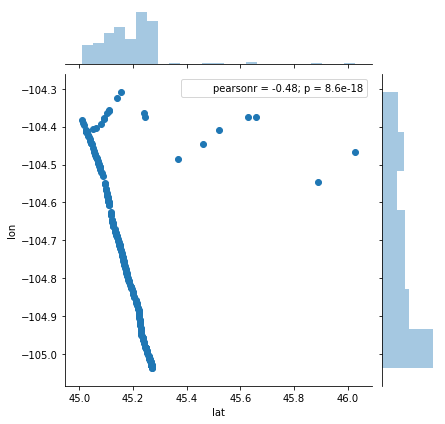

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(x="lat",y="lon", data=carter)
plt.show()
#have to fit an ellipse with a standard deviation of one with respect to the longitude and the latitude to find out the area
#of the county